In [232]:
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/diamond/klno --filename=out.log --output=../data/diamond-klno.json



In [233]:
import matplotlib.pyplot as plt
import numpy as np
import json

from pathlib import Path

figpath = Path("/Users/yangjunjie/Downloads")

import matplotlib
import matplotlib.pyplot as plt
# use latex globally
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'

data = None
with open('../data/diamond-klno.json', 'r') as f:
    data = json.load(f)

kcalmol_to_hartree = 1 / 627.5
print(kcalmol_to_hartree)

basis = []
nkpt = []
kecut = []
method = []
for d in data:
    # print(d, data[d])
    basis.append(data[d].get('basis', ''))
    nkpt.append(int(data[d].get('nkpt', 0)))
    ke_cutoff = data[d].get('ke_cutoff', 0)
    if ke_cutoff != 'None':
        kecut.append(float(ke_cutoff))
    method.append(data[d].get('method', ''))

basis = list(set(basis))
nkpt = list(set(nkpt))
kecut = list(set(kecut))
method = list(set(method))

nkpt.sort()
kecut.sort()
print(method)

color = {'FFTISDF': 'b', 'GDF': 'r', 'RSDF': 'r', 'FFTDF': 'g'}

print(basis)
for k, v in data.items():
    print(k, v)
    break


0.0015936254980079682
['rsdf-1.1', 'fftisdf-50-15', 'rsdf-2.0', 'rsdf-2.2', 'fftisdf-100-30', 'fftisdf-150-10', 'rsdf-1.2', 'fftisdf-100-10', 'fftisdf-150-30', 'fftisdf-100-5', 'fftisdf-200-5', 'rsdf-1.6', 'fftisdf-200-25', 'fftisdf-50-25', 'fftisdf-100-25', 'fftisdf-150-25', 'rsdf-1.4', 'fftisdf-50-5', 'fftisdf-150-15', 'fftisdf-200-30', 'rsdf-1.8', 'fftisdf-50-30', 'fftisdf-100-20', 'fftisdf-50-10', 'fftisdf-150-5', 'fftisdf-100-15', 'fftisdf-150-20', 'fftisdf-50-20', 'fftisdf-200-10', 'fftisdf-200-15', 'fftisdf-200-20']
['gth-dzvp']
/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/diamond/klno/3-4-4/gth-dzvp/fftisdf/50/20 {'method': 'fftisdf-50-20', 'basis': 'gth-dzvp', 'nao': 26.0, 'natm': 2.0, 'naux': 520.0, 'nkpt': 48.0, 'kmesh': '[3, 4, 4]', 'ene_krhf': -11.03593093, 'ene_klno_mp2': -11.03791715, 'ene_klno_ccsd': -11.03837485, 'time_build_df': 27.61, 'time_get_vk': 0.45, 'time_klno': 69.84}


ene_krhf ['', 'krhf']
ene_klno_mp2 ['', 'klno_mp2']
ene_klno_ccsd ['', 'klno_ccsd']


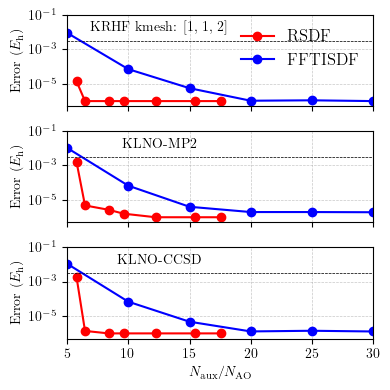

In [234]:
def plot_error_vs_naux(kmesh, eref=None):
    if eref is None:
        eref = -1

    fig, axs = plt.subplots(3, 1, figsize=(4, 4), sharex=True)

    l = []
    for k, v in data.items():
        if k.split('/')[4] == kmesh:
            l.append(v)
    
    for i, n in enumerate(["ene_krhf", "ene_klno_mp2", "ene_klno_ccsd"]):
        ax = axs[i]
        e_ref = None

        method = n.split('ene_')
        print(n, method)
        method = method[1].replace('_', '-').upper()

        if i > 0:
            ax.text(0.3, 0.85, f'{method.upper()}', transform=ax.transAxes, ha='center', va='center')

        else:
            ax.text(0.3, 0.85, f'{method.upper()} kmesh: {kmesh}', transform=ax.transAxes, ha='center', va='center')

        for m in ['rsdf', 'fftisdf-100']:
            l = []

            for k, v in data.items():
                if not v['kmesh'] == str(kmesh):
                    continue
                if m in v["method"]:
                    l.append(v)

            x = []
            e = []
            for il in l:
                x.append(float(il["naux"]) / float(il["nao"]))
                e.append(il[n])

            x = np.array(x)
            e = np.array(e)
            ix = np.argsort(x)
            xx = x[ix]
            
            e = e[ix]
            if e_ref is None:
                e_ref = e[eref]

            yy = [max(1e-6, abs(y)) for y in (e - e_ref)]
            yy = np.array(yy) # float(il["natm"])

            # print(m, n, kmesh, e_ref, e, y)

            ax.semilogy(xx, yy, color=color[m.split('-')[0].upper()], label=m.split('-')[0].upper(), marker='o')
            # ax.set_ylim(-0.001, 0.001)
            ax.set_xlim(5, 30)
            ax.set_ylim(5e-7, 1e-1)
            ax.set_ylabel(r'Error ($E_\mathrm{h}$)')

            ax.grid(
                which='both',
                axis='both',
                linestyle='--',
                linewidth=0.5,
                alpha=0.7
            )

            ax.hlines(2 * kcalmol_to_hartree, 5, 30, color='k', linestyle='--', linewidth=0.5, alpha=0.7)
            ax.hlines(-2 * kcalmol_to_hartree, 5, 30, color='k', linestyle='--', linewidth=0.5, alpha=0.7)
    
    axs[-1].set_xlabel(r'$N_{\mathrm{aux}}/N_{\mathrm{AO}}$')
    axs[0].legend(
        loc='upper right',
        bbox_to_anchor=(1, 1),
        ncol=1,
        fontsize=12,
        frameon=False
    )
    
    fig.tight_layout()


plot_error_vs_naux([1, 1, 2])

ene_krhf ['', 'krhf']
ene_klno_mp2 ['', 'klno_mp2']
ene_klno_ccsd ['', 'klno_ccsd']


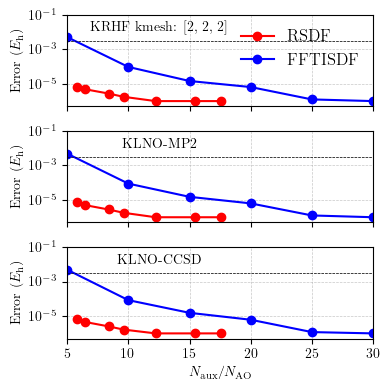

In [235]:
plot_error_vs_naux([2, 2, 2])

ene_krhf ['', 'krhf']
ene_klno_mp2 ['', 'klno_mp2']
ene_klno_ccsd ['', 'klno_ccsd']


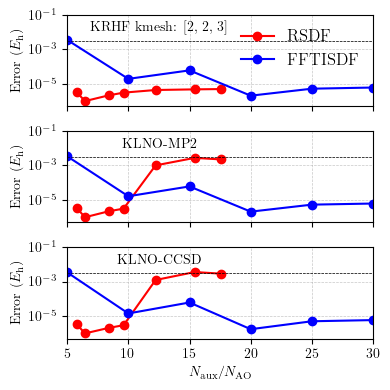

In [236]:
plot_error_vs_naux([2, 2, 3], eref=1)

ene_krhf ['', 'krhf']
ene_klno_mp2 ['', 'klno_mp2']
ene_klno_ccsd ['', 'klno_ccsd']


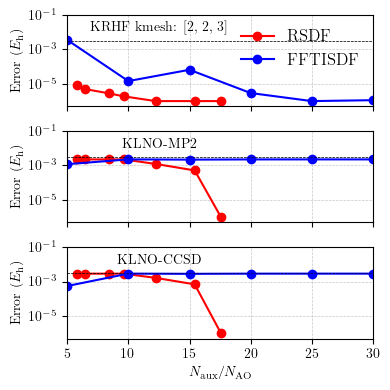

In [237]:
plot_error_vs_naux([2, 2, 3], eref=-1)

ene_krhf ['', 'krhf']
ene_klno_mp2 ['', 'klno_mp2']
ene_klno_ccsd ['', 'klno_ccsd']


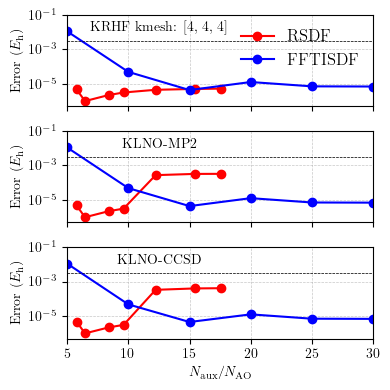

In [238]:
plot_error_vs_naux([4, 4, 4], eref=1)

ene_krhf ['', 'krhf']
ene_klno_mp2 ['', 'klno_mp2']
ene_klno_ccsd ['', 'klno_ccsd']


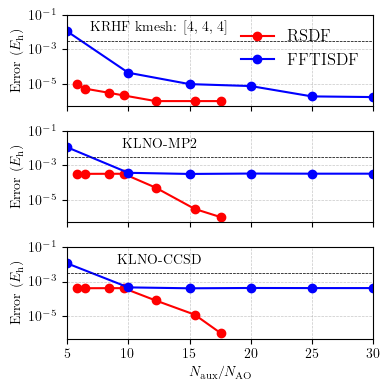

In [239]:
plot_error_vs_naux([4, 4, 4], eref=-1)

[ 2  4  8 12 18 27 36 48 64] [1.        2.        3.        3.5849625 4.169925  4.7548875 5.169925
 5.5849625 6.       ] [39.42, 43.49, 51.84, 49.6, 52.96, 50.25, 72.3, 86.84, 98.87]
[ 2  4  8 12 18 27 36 48 64] [1.        2.        3.        3.5849625 4.169925  4.7548875 5.169925
 5.5849625 6.       ] [8.25, 11.3, 20.23, 20.09, 32.03, 30.37, 41.78, 45.65, 49.4]
[ 2  4  8 12 18 27 36 48 64] [1.        2.        3.        3.5849625 4.169925  4.7548875 5.169925
 5.5849625 6.       ] [0.11, 0.32, 0.71, 1.6, 3.3, 6.89, 11.89, 19.63, 36.43]
[ 2  4  8 12 18 27 36 48 64] [1.        2.        3.        3.5849625 4.169925  4.7548875 5.169925
 5.5849625 6.       ] [0.01, 0.02, 0.03, 0.04, 0.06, 0.07, 0.18, 0.13, 0.18]
[ 2  4  8 12 18 27 36 48 64] [1.        2.        3.        3.5849625 4.169925  4.7548875 5.169925
 5.5849625 6.       ] [4.93, 6.46, 9.97, 16.73, 34.43, 77.84, 203.4, 529.93, 1492.99]
[ 2  4  8 12 18 27 36 48 64] [1.        2.        3.        3.5849625 4.169925  4.7548875 5.16992

/var/folders/sm/7t_ndz1j5n5dlj8m6tnm2h480000gn/T/ipykernel_3794/2964970113.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[-1].set_xticklabels(xticks)


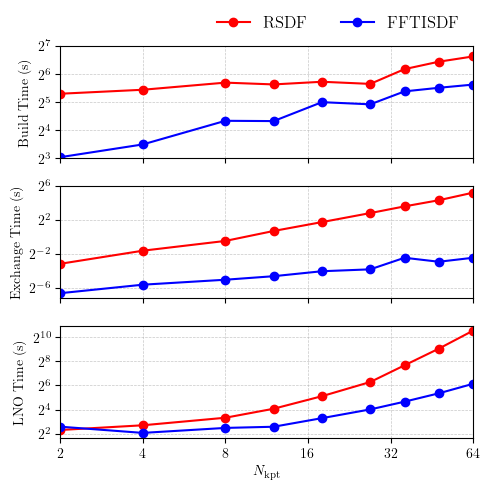

In [259]:
fig, ax = plt.subplots(3, 1, figsize=(5, 5), sharex=True)
y_label = ['Build Time (s)', 'Exchange Time (s)', 'LNO Time (s)']

for ikey, key in enumerate(['time_build_df', 'time_get_vk', 'time_klno']):
    ax[ikey].set_ylabel(y_label[ikey])

    xx = np.array(nkpt)
    for m in ['rsdf-1.6', 'fftisdf-100-10']:
        yy = []

        for x in xx:
            for k, v in data.items():
                if not v['nkpt'] == x:
                    continue

                if m in v["method"]:
                    yy.append(v[key])
                    # break

        print(xx, np.log2(xx), yy)
        ax[ikey].semilogy(np.log2(xx), yy, marker='o', label=m.split('-')[0].upper(), color=color[m.split('-')[0].upper()], base=2)

        ax[ikey].set_xlim(1, 6)
        ax[ikey].grid(
            which='both',
            axis='both',
            linestyle='--',
            linewidth=0.5,
            alpha=0.7
        )


ax[0].set_ylim(8, 128)
yy = [3, 4, 5, 6, 7]
ax[0].set_yticks([2 ** y for y in yy])
ax[0].set_yticklabels(["$2^{%d}$" % y for y in yy])

yy = [-6, -2, 2, 6]
ax[1].set_yticks([2 ** y for y in yy])
ax[1].set_yticklabels(["$2^{%d}$" % y for y in yy])

yy = [2, 4, 6, 8, 10]
ax[2].set_yticks([2 ** y for y in yy])
ax[2].set_yticklabels(["$2^{%d}$" % y for y in yy])

ax[0].legend(
    loc='upper right', bbox_to_anchor=(1, 1.4), 
    ncol=2, fontsize=12, frameon=False
    )

xticks = ["%d" % (2 ** i) for i in range(1, 7)]
print(xticks)
print(nkpt)
ax[-1].set_xticklabels(xticks)
ax[-1].set_xlabel(r'$N_{\mathrm{kpt}}$')
fig.tight_layout()